In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans 


In [2]:
dat = pd.read_csv('Country-data.csv')
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
dat["exports"] = dat["exports"]*dat["gdpp"]/100
dat["imports"] = dat["imports"]*dat["gdpp"]/100
dat["health"] = dat["health"]*dat["gdpp"]/100

In [4]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
dat.shape

(167, 10)

In [7]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
dat.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

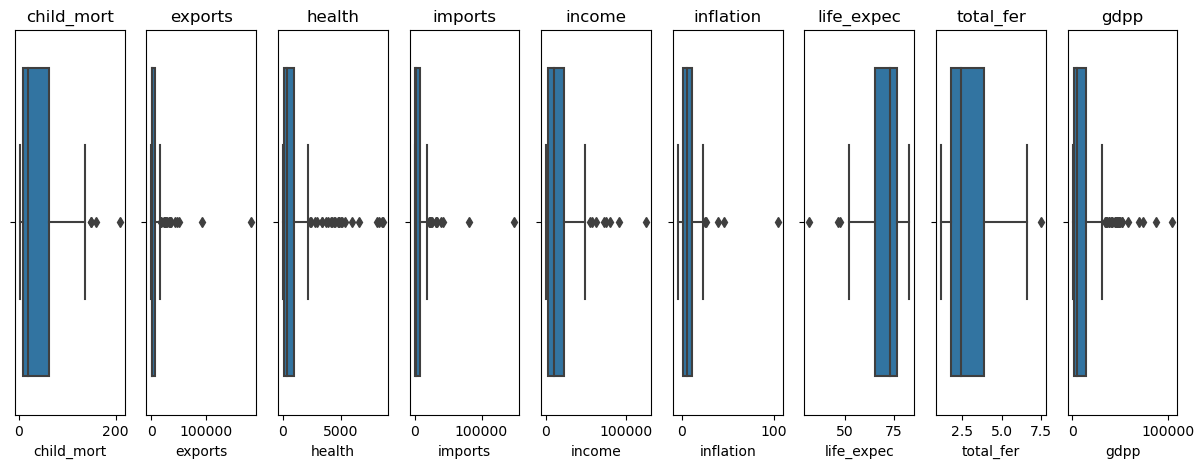

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dat is your DataFrame
# Check data types and filter out non-numeric columns
numeric_columns = dat.select_dtypes(include=['int64', 'float64']).columns

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))

# Loop through numeric columns and create boxplots
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=dat[col], ax=axes[i])
    axes[i].set_title(col)

plt.show()


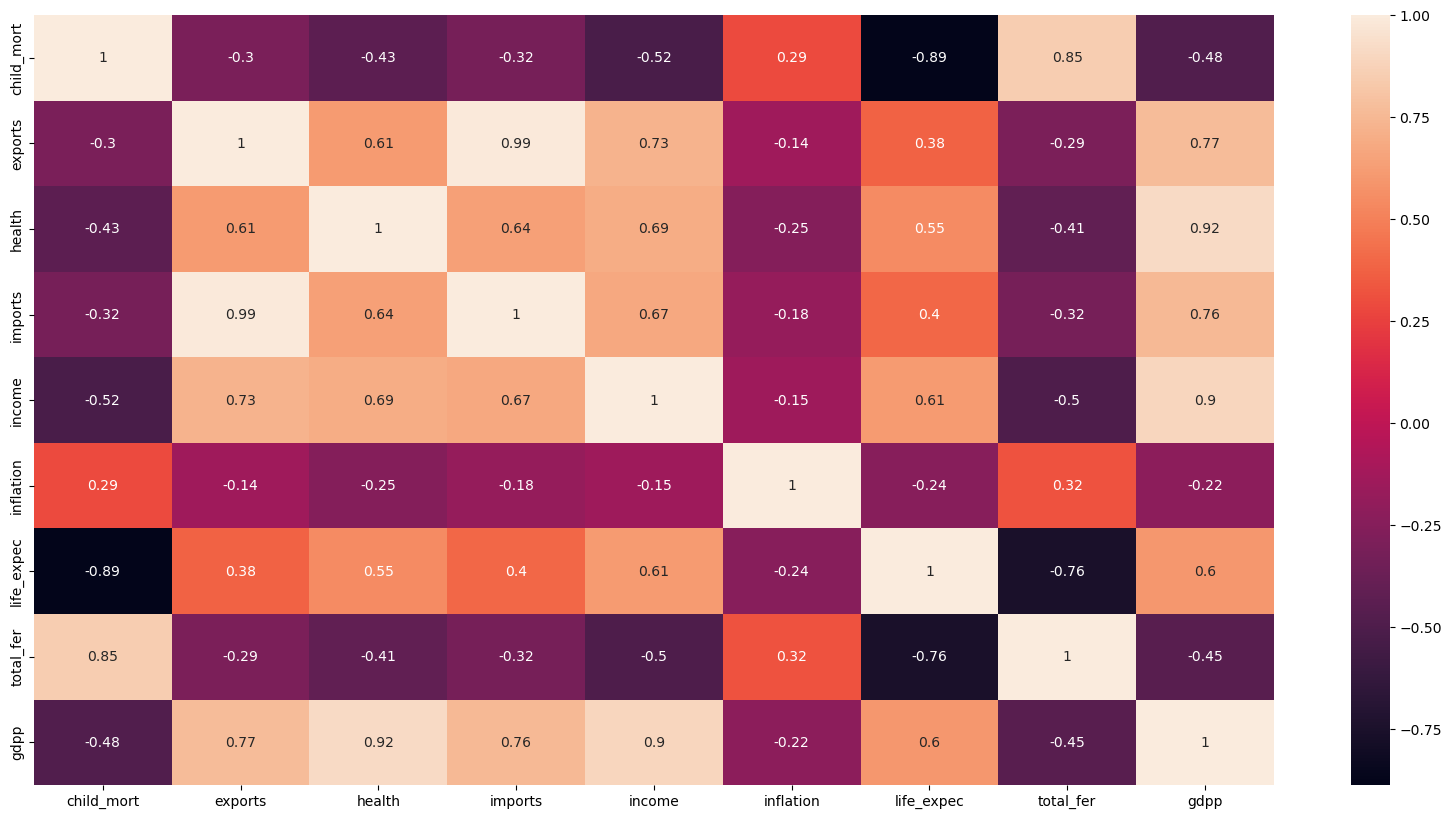

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dat is your DataFrame
# Select only numeric columns for correlation matrix
numeric_columns = dat.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = dat[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True)

plt.show()


In [45]:
from sklearn.preprocessing import StandardScaler

# Correct the class name
standard_scaler = StandardScaler()

# Assuming dat is your DataFrame
datm = standard_scaler.fit_transform(dat.drop(["country"], axis=1))
datm = pd.DataFrame(datm, columns=['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'])

print(datm)


     child_mort   exports    health   imports    income  inflation  \
0      1.291532 -0.411011 -0.565040 -0.432276 -0.808245   0.157336   
1     -0.538949 -0.350191 -0.439218 -0.313677 -0.375369  -0.312347   
2     -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   0.789274   
3      2.007808 -0.291375 -0.532363 -0.345953 -0.585043   1.387054   
4     -0.695634 -0.104331 -0.178771  0.040735  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578 -0.336864 -0.501562 -0.342488 -0.738527  -0.489784   
163   -0.526514 -0.199393 -0.219310 -0.287205 -0.033542   3.616865   
164   -0.372315 -0.361463 -0.538488 -0.377572 -0.658404   0.409732   
165    0.448417 -0.392166 -0.550596 -0.418479 -0.658924   1.500916   
166    1.114951 -0.383952 -0.540498 -0.418445 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3  

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(datm):
    vif = pd.DataFrame()
    vif["Variables"] = datm.columns
    vif["VIF"] = [variance_inflation_factor(datm.values, i) for i in range(datm.shape[1])]
    return(vif)

In [47]:
calc_vif(datm)

,Variables,VIF
0,child_mort,7.294127
1,exports,116.652517
2,health,18.818141
3,imports,101.647811
4,income,14.906308
5,inflation,1.200193
6,life_expec,6.006097
7,total_fer,3.896214
8,gdpp,49.647627


In [48]:
datm = datm.iloc[:,[1,0,2,3,4,5,6,7,8]]
datm = datm.iloc[:,1:]
calc_vif(datm)

,Variables,VIF
0,child_mort,7.291253
1,health,15.733260
2,imports,2.605620
3,income,13.106089
4,inflation,1.172755
5,life_expec,5.788959
6,total_fer,3.768304
7,gdpp,46.921736


In [43]:
datm

,child_mort,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...
162,-0.225578,-0.501562,-0.342488,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.219310,-0.287205,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,-0.538488,-0.377572,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.550596,-0.418479,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [49]:
datm = datm.iloc[:,:7]
calc_vif(datm)

,Variables,VIF
0,child_mort,7.283204
1,health,2.369601
2,imports,2.070272
3,income,2.802828
4,inflation,1.168983
5,life_expec,5.775690
6,total_fer,3.706232


In [50]:
datm = datm.iloc[:,1:]
calc_vif(datm)

,Variables,VIF
0,health,2.337106
1,imports,2.068871
2,income,2.802648
3,inflation,1.161083
4,life_expec,2.995426
5,total_fer,2.528805


In [51]:
dcon = pd.concat([dat.loc[:,"country"],datm],axis = 1)
dcon.head()

,country,health,imports,income,inflation,life_expec,total_fer
0,Afghanistan,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882
1,Albania,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973
2,Algeria,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404
3,Angola,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151
4,Antigua and Barbuda,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946


In [52]:
Qa = dcon.health.quantile(0.025)
Qb = dcon.health.quantile(0.975)
dcon = dcon[(dcon.health >= Qa) & (dcon.health <= Qb)]
Qa = dcon.imports.quantile(0.025)
Qb = dcon.imports.quantile(0.975)
dcon = dcon[(dcon.imports >= Qa) & (dcon.imports <= Qb)]
Qa = dcon.income.quantile(0.025)
Qb = dcon.income.quantile(0.975)
dcon = dcon[(dcon.income >= Qa) & (dcon.income <= Qb)]
Qa = dcon.inflation.quantile(0.025)
Qb = dcon.inflation.quantile(0.975)
dcon = dcon[(dcon.inflation >= Qa) & (dcon.inflation <= Qb)]
Qa = dcon.life_expec.quantile(0.025)
Qb = dcon.life_expec.quantile(0.975)
dcon = dcon[(dcon.life_expec >= Qa) & (dcon.life_expec <= Qb)]
Qa = dcon.total_fer.quantile(0.025)
Qb = dcon.total_fer.quantile(0.975)
dcon = dcon[(dcon.total_fer >= Qa) & (dcon.total_fer <= Qb)]




In [54]:
len(dcon.index)

117

In [55]:
new_index_labels = [i + 1 for i in range(len(dcon.index))]
dcon.index = new_index_labels


In [56]:
dcon.shape

(117, 7)

In [57]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [58]:
X = dcon.drop(['country'],axis=1)
hopkins(X)

0.7971133151391518

In [59]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])

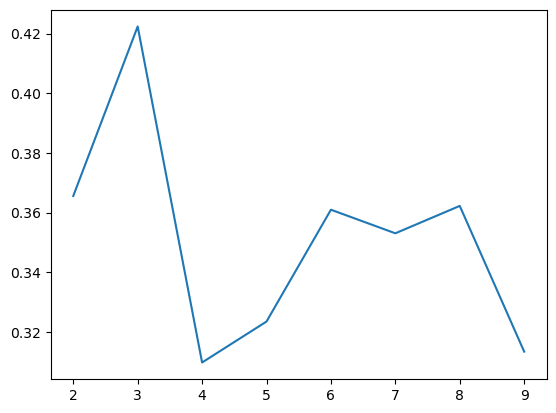

In [60]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

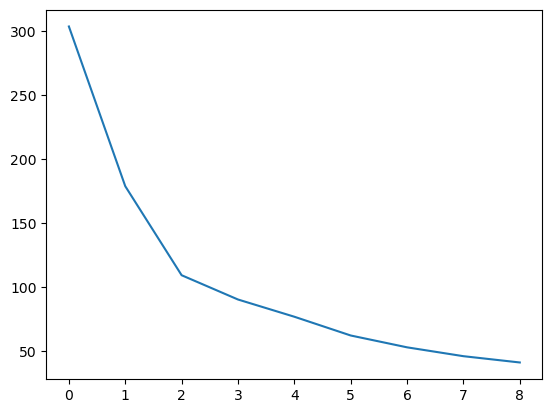

In [61]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(X)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [62]:
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(X)

KMeans(max_iter=50, n_clusters=5)

In [63]:
dat4=dcon
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus5.labels_)], axis=1)

In [64]:
dat_km

,country,health,imports,income,inflation,life_expec,total_fer,0
0,Afghanistan,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,0
1,Albania,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,3
2,Algeria,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,4
3,Antigua and Barbuda,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,3
4,Argentina,-0.123849,-0.336841,0.080920,1.244725,0.591474,-0.382933,4
...,...,...,...,...,...,...,...,...
112,Uruguay,-0.035124,-0.243119,-0.002325,-0.272496,0.659145,-0.575074,3
113,Uzbekistan,-0.543737,-0.422389,-0.671411,0.827229,-0.198014,-0.402810,4
114,Vanuatu,-0.501562,-0.342488,-0.738527,-0.489784,-0.852161,0.365754,2
115,Vietnam,-0.538488,-0.377572,-0.658404,0.409732,0.286958,-0.661206,4


In [65]:
dat_km.rename(columns = {0: "ClusterID"}, inplace = True)
dat_km.head()

,country,health,imports,income,inflation,life_expec,total_fer,ClusterID
0,Afghanistan,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,0
1,Albania,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,3
2,Algeria,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,4
3,Antigua and Barbuda,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,3
4,Argentina,-0.123849,-0.336841,0.080920,1.244725,0.591474,-0.382933,4


In [66]:
dat_km['ClusterID'].value_counts()

ClusterID
3    39
0    25
2    25
4    15
1    13
Name: count, dtype: int64

<Axes: xlabel='imports', ylabel='inflation'>

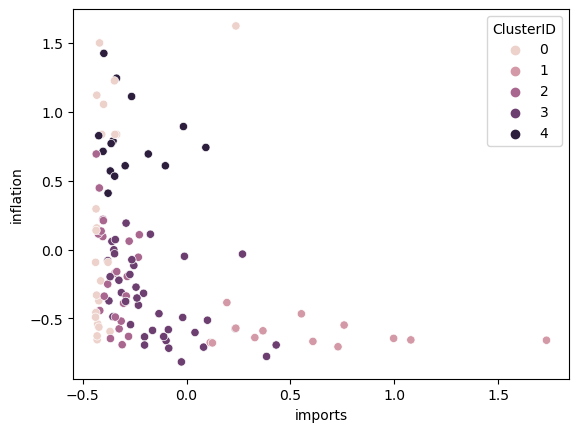

In [67]:
sns.scatterplot(x='imports',y='inflation',hue='ClusterID',legend='full',data=dat_km)

<Axes: xlabel='inflation', ylabel='health'>

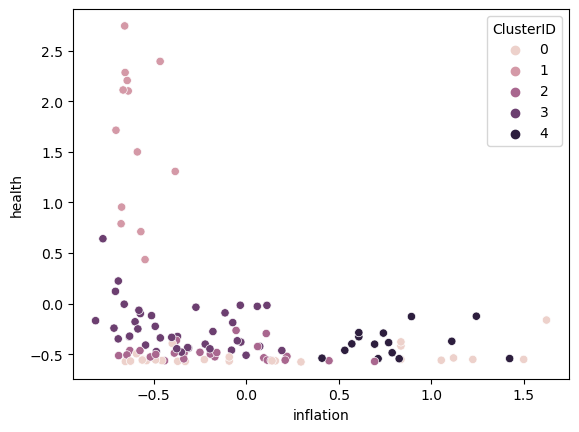

In [68]:
sns.scatterplot(x='inflation',y='health',hue='ClusterID',data=dat_km)

<Axes: xlabel='health', ylabel='imports'>

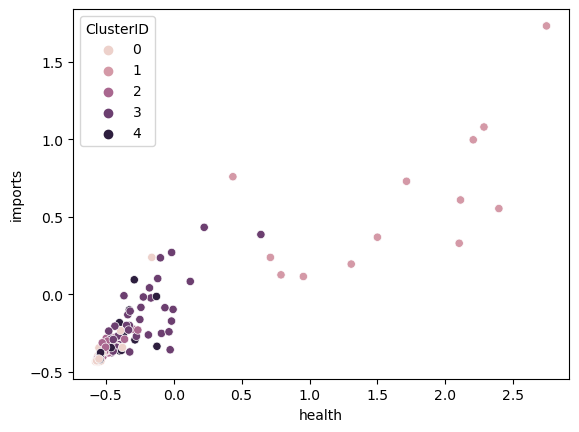

In [69]:
sns.scatterplot(x='health',y='imports',hue='ClusterID',data=dat_km)

In [70]:
dat_km1=dat_km[['country', 'ClusterID']]
dat5=pd.merge(dat,dat_km1,on='country')
dat6=dat5[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
clu_chi = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exp= 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_imp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_hea = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_inc = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inf = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())         
clu_lif = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_tot = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1,2,3,4]),clu_chi,clu_exp,clu_imp,clu_hea,clu_inc,clu_inf,clu_lif,clu_tot,clu_gdpp], axis=1)
df.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,79.720000,1256.025080,1047.325680,122.089792,4858.000000,9.313800,61.912000,4.812400,2296.560000
1,1,4.323077,15738.907692,15413.138462,3992.779231,36715.384615,1.395154,80.630769,1.810769,39130.769231
2,2,37.064000,1251.542464,1538.155440,176.029328,6240.400000,6.019640,68.808000,3.050800,2928.240000
3,3,13.733333,4011.600000,4392.539744,636.597410,15244.102564,3.967179,75.535897,1.892564,9023.333333
4,4,19.806667,3528.870667,2547.275333,359.680733,18549.333333,16.173333,72.520000,2.218667,7680.666667


<Axes: xlabel='child_mort', ylabel='health'>

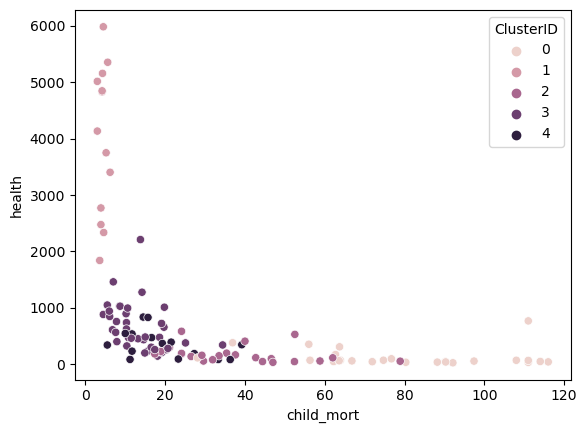

In [71]:
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',data=dat6)

In [72]:
dat6[dat6['ClusterID']==1]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
6,Austria,4.3,24059.7,22418.2,5159.00,43200,0.873,80.5,1.44,46900,1
22,Canada,5.6,13793.4,14694.0,5356.20,40700,2.870,81.3,1.63,47400,1
32,Cyprus,3.6,15461.6,17710.0,1838.76,33900,2.010,79.9,1.42,30800,1
40,Finland,3.0,17879.4,17278.8,4134.90,39800,0.351,80.0,1.87,46200,1
41,France,4.2,10880.8,11408.6,4831.40,36900,1.050,81.4,2.03,40600,1
45,Germany,4.2,17681.4,15507.8,4848.80,40400,0.758,80.1,1.39,41800,1
47,Greece,3.9,5944.9,8258.3,2770.70,28700,0.673,80.4,1.48,26900,1
56,Israel,4.6,10710.0,10067.4,2334.78,29600,1.770,81.4,3.03,30600,1
78,Netherlands,4.5,36216.0,31990.8,5985.70,45500,0.848,80.7,1.79,50300,1
79,New Zealand,6.2,10211.1,9436.0,3403.70,32300,3.730,80.9,2.17,33700,1


<Axes: xlabel='income', ylabel='gdpp'>

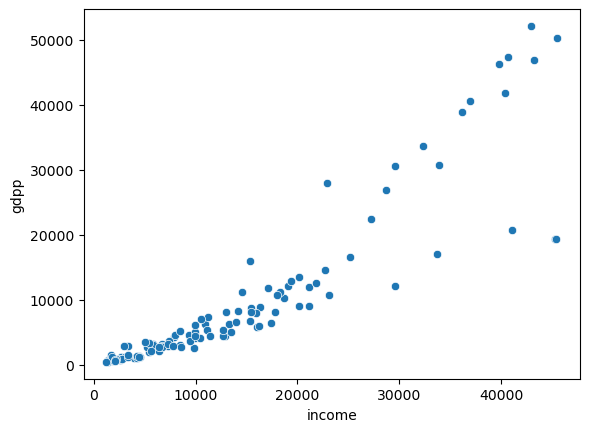

In [73]:
sns.scatterplot(x='income',y='gdpp',data=dat6)

In [74]:
p=dat6[dat6['ClusterID']==3]
print(p.max())
print(p.median())

country       Uruguay
child_mort       34.4
exports       14386.5
imports       12914.8
health         2209.2
income          41100
inflation        9.81
life_expec       80.4
total_fer        2.66
gdpp            28000
ClusterID           3
dtype: object


TypeError: could not convert string to float: 'Albania'